In [1]:
%pip install geopandas seaborn pandana folium matplotlib mapclassify osmnx fiona pyogrio --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packets
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import osmnx as ox
import seaborn as sns
import numpy as np
from scipy.spatial import cKDTree
from matplotlib.lines import Line2D
import networkx as nx
from shapely.geometry import Point
import folium


In [6]:
#clone the repository
!git clone https://github.com/clelia-p/geospatial_analysis.git

Cloning into 'geospatial_analysis'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 9), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 500.15 KiB | 984.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.


In [13]:
#what is my directory
!pwd

/home/cle01/geospatial_analysis


In [ ]:
#unzip the data folders
!unzip /home/cle01/geospatial_analysis/data/Rastrelliere.zip
!unzip /home/cle01/geospatial_analysis/data/Punti_Noleggio_bici.zip
!unzip /home/cle01/geospatial_analysis/data/Aree_pedonali.zip
!unzip /home/cle01/geospatial_analysis/data/Aree_quartieri.zip

Archive:  /home/cle01/geospatial_analysis/data/Rastrelliere.zip
replace Rastrelliere/METADATO_E_LICENZA/Rastrelliere.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Archive:  /home/cle01/geospatial_analysis/data/Punti_Noleggio_bici.zip
  inflating: Punti_Noleggio_bici/METADATO_E_LICENZA/Punti_Noleggio_bici.xml  
  inflating: Punti_Noleggio_bici/NOTE_LEGALI/Note_legali.txt  
  inflating: Punti_Noleggio_bici/METADATO_E_LICENZA/Punti_Noleggio_bici_formatted.xml  
  inflating: Punti_Noleggio_bici/METADATO_E_LICENZA/metadata_formatted.css  
  inflating: Punti_Noleggio_bici/METADATO_E_LICENZA/licenza.txt  
  inflating: Punti_Noleggio_bici/SHP/noleggio_bici.zip  
  inflating: Punti_Noleggio_bici/KML/noleggio_bici.kmz  
  inflating: Punti_Noleggio_bici/WMS/Punti_Noleggio_bici_layer_wms.txt  
Archive:  /home/cle01/geospatial_analysis/data/Aree_pedonali.zip
  inflating: Aree_pedonali/METADATO_E_LICENZA/Aree_pedonali.xml  
  inflating: Aree_pedonali/NOTE_LEGALI/Note_legali.txt  
  inflating: Aree_p

In [21]:
#unzip the data
!unzip /home/cle01/geospatial_analysis/Aree_quartieri/SHP/quartieri.zip

Archive:  /home/cle01/geospatial_analysis/Aree_quartieri/SHP/quartieri.zip
  inflating: quartieriPolygon.dbf    
  inflating: quartieriPolygon.prj    
  inflating: quartieriPolygon.shp    
  inflating: quartieriPolygon.shx    


In [22]:
!unzip /home/cle01/geospatial_analysis/Aree_pedonali/SHP/areepedonali.zip
!unzip /home/cle01/geospatial_analysis/Punti_Noleggio_bici/SHP/noleggio_bici.zip
!unzip /home/cle01/geospatial_analysis/Rastrelliere/SHP/rastrelliere.zip

Archive:  /home/cle01/geospatial_analysis/Aree_pedonali/SHP/areepedonali.zip
  inflating: areepedonaliPolygon.shx  
  inflating: areepedonaliPolygon.shp  
  inflating: areepedonaliPolygon.prj  
  inflating: areepedonaliPolygon.dbf  
Archive:  /home/cle01/geospatial_analysis/Punti_Noleggio_bici/SHP/noleggio_bici.zip
  inflating: noleggio_biciPoint.shp  
  inflating: noleggio_biciPoint.shx  
  inflating: noleggio_biciPoint.prj  
  inflating: noleggio_biciPoint.dbf  
Archive:  /home/cle01/geospatial_analysis/Rastrelliere/SHP/rastrelliere.zip
  inflating: rastrellierePoint.dbf   
  inflating: rastrellierePoint.shp   
  inflating: rastrellierePoint.prj   
  inflating: rastrellierePoint.shx   


In [28]:
#now we can load the data
quartieri= gpd.read_file('quartieriPolygon.shp').to_crs(epsg=4326)
rastrelliere= gpd.read_file('rastrellierePoint.shp').to_crs(epsg=4326)
noleggio_bici= gpd.read_file('noleggio_biciPoint.shp').to_crs(epsg=4326)
areepedonali= gpd.read_file('areepedonaliPolygon.shp').to_crs(epsg=4326)

In [29]:
#check the data
quartieri.head()

,SCRITTA,geometry
0,5 RIFREDI,"POLYGON ((11.15421 43.78638, 11.15352 43.78623..."
1,3 GAVINANA GALLUZZO,"MULTIPOLYGON (((11.23119 43.75928, 11.23121 43..."
2,4 ISOLOTTO LEGNAIA,"POLYGON ((11.20787 43.74914, 11.20772 43.74942..."
3,1 CENTRO STORICO,"POLYGON ((11.23119 43.75928, 11.23157 43.75978..."
4,2 CAMPO DI MARTE,"POLYGON ((11.27099 43.7649, 11.27116 43.76587,..."


<Axes: >

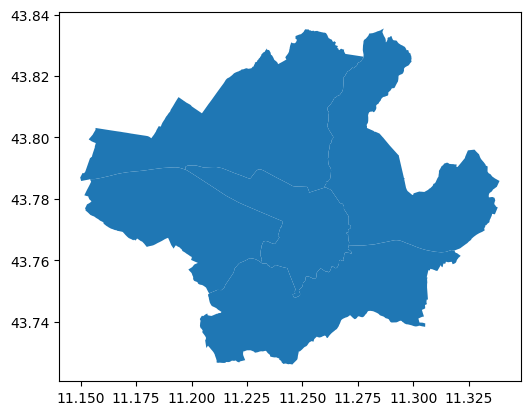

In [30]:
#plot the data
quartieri.plot()

<Axes: >

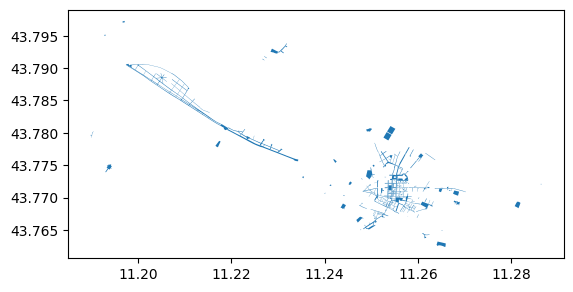

In [37]:
#areepedonali
aree_ped= gpd.overlay( areepedonali, quartieri, how='intersection')

#plot
aree_ped.plot()


In [16]:
#commit the changes
!git add .
!git commit -m "Add data files"
!git push origin main


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Username for 'https://github.com': ^C


In [4]:
!git config --global user.email "clelia.porcelluzzi@studenti.unitn.it"
!git config --global user.name "clelia-p"